**TCP packet delay considering all variance flavors**

**Read json files**

In [1]:
import json
import numpy as np
#Read reno delay json file
with open("data/reno_delay.json", 'r') as reno_file:
    reno_data = json.load(reno_file)
    
intervals = reno_data['intervals']
rtt_reno =[]
var_reno = []
cwnd_reno =[]


for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_reno.append(rtt)
    cwnd_reno.append(window_size/1000000)
    var_reno.append(rtt_variance)
    
print(rtt_reno)
print(cwnd_reno)
print(var_reno)

[90661, 93661, 96770, 95452, 108148, 110278, 96756, 101659, 94620, 103666, 92538, 91702, 93805, 108048, 96562, 113838, 103238, 91679, 100177, 93190]
[7.868432, 8.039296, 8.039296, 8.059568, 8.059568, 8.0726, 8.0726, 8.082736, 8.097216, 8.097216, 8.097216, 8.097216, 8.097216, 8.097216, 8.097216, 8.097216, 8.097216, 8.097216, 8.097216, 8.097216]
[516, 1130, 114, 106, 528, 145, 60, 3953, 216, 67, 153, 300, 153, 165, 344, 180, 10427, 169, 25, 1051]


In [2]:
#Read cubic delay json file
with open("data/cubic_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)
    
intervals = cubic_data['intervals']
rtt_cubic =[]
var_cubic = []
cwnd_cubic =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_cubic.append(rtt)
    cwnd_cubic.append(window_size/1000000)
    var_cubic.append(rtt_variance)
    
print(rtt_cubic)
print(cwnd_cubic)
print(var_cubic)

[99318, 93315, 87419, 88872, 94036, 91940, 94249, 90596, 89826, 99058, 86968, 92754, 92581, 93857, 96237, 87485, 88418, 88981, 91786, 98553]
[7.866984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984, 8.07984]
[1685, 151, 144, 304, 92, 2458, 553, 238, 151, 5586, 187, 58, 206, 776, 9, 72, 298, 282, 140, 604]


In [3]:
#Read vegas delay json file
with open("data/vegas_delay.json", 'r') as vegas_file:
    vegas_data = json.load(vegas_file)
    
intervals = vegas_data['intervals']
rtt_vegas =[]
cwnd_vegas =[]
var_vegas = []

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_vegas.append(rtt)
    cwnd_vegas.append(window_size/1000000)
    var_vegas.append(rtt_variance)
    
print(rtt_vegas)
print(cwnd_vegas)
print(var_vegas)

[92217, 96347, 84518, 95109, 93169, 91154, 99498, 86059, 96544, 85916, 96829, 86082, 93159, 86054, 88296, 107528, 85331, 92288, 96213, 102228]
[10.144688, 10.263424, 10.248944, 10.235912, 10.22288, 10.209848, 10.20116, 10.18668, 10.175096, 10.163512, 10.15048, 10.136, 10.125864, 10.111384, 10.098352, 10.088216, 10.073736, 10.060704, 10.047672, 10.03464]
[249, 465, 260, 247, 157, 68, 507, 161, 61, 240, 60, 135, 45, 240, 2509, 616, 124, 261, 55, 224]


In [4]:
#Read bbr delay json file
with open("data/bbr_delay.json", 'r') as bbr_file:
    bbr_data = json.load(bbr_file)
    
intervals = bbr_data['intervals']
rtt_bbr =[]
cwnd_bbr =[]
var_bbr = []

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_bbr.append(rtt)
    cwnd_bbr.append(window_size/1000000)
    var_bbr.append(rtt_variance)
    
print(rtt_bbr)
print(cwnd_bbr)
print(var_bbr)

[87540, 89247, 114477, 89083, 95253, 97414, 86424, 87555, 92209, 101239, 101161, 95942, 93229, 92171, 95613, 85556, 92927, 90374, 116460, 90697]
[8.776328, 10.54868, 10.54868, 11.423272, 11.423272, 11.423272, 11.423272, 11.442096, 11.442096, 11.442096, 11.442096, 11.500016, 11.500016, 11.500016, 11.500016, 11.500016, 11.500016, 11.513048, 11.513048, 11.513048]
[214, 313, 141, 133, 150, 499, 129, 186, 348, 57, 167, 138, 210, 229, 154, 196, 88, 320, 114, 5573]


**Plot packet delay of different TCP variances**

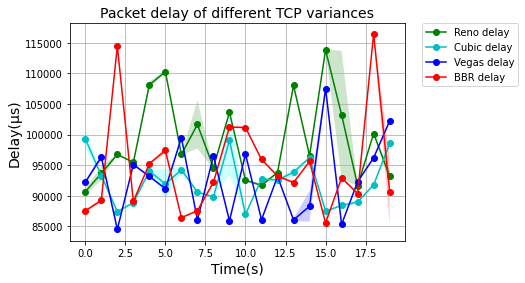

In [10]:
import matplotlib.pyplot as plt
import numpy as np

time = list(range(20))

plt.plot(time, rtt_reno, "go-", label = 'Reno delay')
plt.fill_between(time, np.array(rtt_reno) + np.array(var_reno) , np.array(rtt_reno) - np.array(var_reno) , facecolor='green', alpha =0.2)
plt.plot(time, rtt_cubic, "co-", label = 'Cubic delay')
plt.fill_between(time, np.array(rtt_cubic) + np.array(var_cubic) , np.array(rtt_cubic) - np.array(var_cubic) , facecolor='cyan', alpha =0.2)
plt.plot(time, rtt_vegas, "bo-", label = 'Vegas delay')
plt.fill_between(time, np.array(rtt_vegas) + np.array(var_vegas) , np.array(rtt_vegas) - np.array(var_vegas) , facecolor='blue', alpha =0.2)
plt.plot(time, rtt_bbr, "ro-", label = 'BBR delay')
plt.fill_between(time, np.array(rtt_bbr) + np.array(var_bbr) , np.array(rtt_bbr) - np.array(var_bbr) , facecolor='red', alpha =0.2)

plt.title('Packet delay of different TCP variances', fontsize=14)
plt.xlabel('Time(s)', fontsize=14)
plt.ylabel('Delay(μs)', fontsize=14)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0), borderaxespad = 0.)
plt.grid(True)
plt.show()